In [2]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras import initializers

In [4]:
def init_weights(shape, name=None):
    return initializers.normal(shape, scale=0.01, name=name)

In [6]:
batch_size = 128
nb_epoch = 50

img_rows, img_cols = 28, 28
nb_classes = 10

nb_lstm_outputs = 30
nb_time_steps = img_rows
dim_input_vector = img_cols

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train original shape:', X_train.shape)
input_shape = (nb_time_steps, dim_input_vector)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train original shape: (60000, 28, 28)
X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [11]:
model = Sequential()
model.add(LSTM(nb_lstm_outputs, input_shape=input_shape))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30)                7080      
                                                                 
 dense (Dense)               (None, 10)                310       
                                                                 
Total params: 7,390
Trainable params: 7,390
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, Y_train, epochs = nb_epoch ,batch_size=batch_size, shuffle=True, verbose=1)

Epoch 1/50
469/469 [==============================] - 7s 16ms/step - loss: 0.3764 - accuracy: 0.8899
Epoch 2/50
469/469 [==============================] - 7s 16ms/step - loss: 0.2452 - accuracy: 0.9265
Epoch 3/50
469/469 [==============================] - 7s 16ms/step - loss: 0.1880 - accuracy: 0.9447
Epoch 4/50
469/469 [==============================] - 7s 16ms/step - loss: 0.1588 - accuracy: 0.9536
Epoch 5/50
469/469 [==============================] - 8s 16ms/step - loss: 0.1391 - accuracy: 0.9590
Epoch 6/50
469/469 [==============================] - 7s 16ms/step - loss: 0.1245 - accuracy: 0.9626
Epoch 7/50
469/469 [==============================] - 7s 16ms/step - loss: 0.1128 - accuracy: 0.9658
Epoch 8/50
469/469 [==============================] - 8s 17ms/step - loss: 0.1035 - accuracy: 0.9688
Epoch 9/50
469/469 [==============================] - 7s 16ms/step - loss: 0.0955 - accuracy: 0.9715
Epoch 10/50
469/469 [==============================] - 7s 15ms/step - loss: 0.0876 - accura

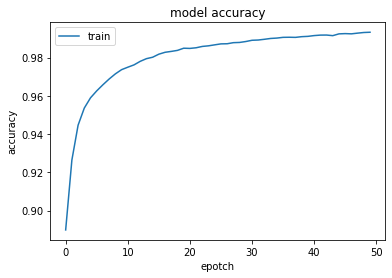

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('epotch')
plt.ylabel('accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

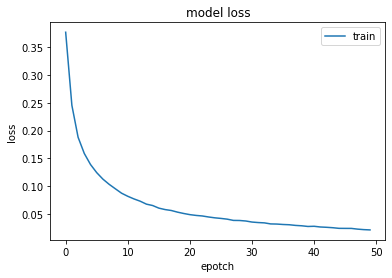

In [18]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.xlabel('epotch')
plt.ylabel('loss')
plt.legend(['train'], loc='upper right')
plt.show()

In [19]:
evaluation = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

79/79 [==============================] - 1s 7ms/step - loss: 0.0575 - accuracy: 0.9839
Summary: Loss over the test dataset: 0.06, Accuracy: 0.98
